In [ ]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import ResNet50

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2

In [ ]:
data= os.listdir('/content/drive/MyDrive/train')

In [ ]:
data

['yawn', 'no_yawn', 'Open', 'Closed']

In [ ]:
def load_data(dataset_dir):
    images = []
    labels = []
    classes = os.listdir(dataset_dir)
    for i, cls in enumerate(classes):
        cls_dir = os.path.join(dataset_dir, cls)
        for image_name in os.listdir(cls_dir):
            image_path = os.path.join(cls_dir, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))
            images.append(image)
            labels.append(i)
    return np.array(images), np.array(labels)

In [ ]:
dataset_dir = "/content/drive/MyDrive/train"
images, labels = load_data(dataset_dir)

In [ ]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
def load_data(dataset_dir):
    images = []
    labels = []
    classes = os.listdir(dataset_dir)
    for i, cls in enumerate(classes):
        cls_dir = os.path.join(dataset_dir, cls)
        for image_name in os.listdir(cls_dir):
            image_path = os.path.join(cls_dir, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (64, 64))
            images.append(image)
            labels.append(i)
    return np.array(images), np.array(labels)


dataset_dir = "/content/drive/MyDrive/train"
images, labels = load_data(dataset_dir)


train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


train_images = train_images / 255.0
test_images = test_images / 255.0
model = Sequential([
    LSTM(64, input_shape=(None, 64*64*3)),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


train_images = train_images.reshape((-1, 1, 64*64*3))
test_images = test_images.reshape((-1, 1, 64*64*3))


model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test accuracy:", test_acc)

Epoch 1/10
73/73 [==============================] - 5s 15ms/step - loss: 1.0534 - accuracy: 0.4849 - val_loss: 0.8600 - val_accuracy: 0.6103
Epoch 2/10
73/73 [==============================] - 0s 7ms/step - loss: 0.8915 - accuracy: 0.5534 - val_loss: 0.7482 - val_accuracy: 0.7052
Epoch 3/10
73/73 [==============================] - 0s 7ms/step - loss: 0.8282 - accuracy: 0.5823 - val_loss: 0.7127 - val_accuracy: 0.7466
Epoch 4/10
73/73 [==============================] - 0s 6ms/step - loss: 0.7845 - accuracy: 0.5935 - val_loss: 0.6415 - val_accuracy: 0.7638
Epoch 5/10
73/73 [==============================] - 0s 7ms/step - loss: 0.7369 - accuracy: 0.6272 - val_loss: 0.6458 - val_accuracy: 0.6931
Epoch 6/10
73/73 [==============================] - 0s 7ms/step - loss: 0.7073 - accuracy: 0.6569 - val_loss: 0.5857 - val_accuracy: 0.7828
Epoch 7/10
73/73 [==============================] - 1s 9ms/step - loss: 0.6812 - accuracy: 0.6500 - val_loss: 0.5919 - val_accuracy: 0.7741
Epoch 8/10
73/73 [=

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
train_images = train_images.reshape((-1, 64, 64, 3))
test_images = test_images.reshape((-1, 64, 64, 3))

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

test_loss, test_accuracy = model_cnn.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
73/73 [==============================] - 3s 11ms/step - loss: 0.6239 - accuracy: 0.7207 - val_loss: 0.4650 - val_accuracy: 0.7879
Epoch 2/10
73/73 [==============================] - 0s 6ms/step - loss: 0.3129 - accuracy: 0.8625 - val_loss: 0.2714 - val_accuracy: 0.9000
Epoch 3/10
73/73 [==============================] - 0s 6ms/step - loss: 0.2081 - accuracy: 0.9216 - val_loss: 0.2184 - val_accuracy: 0.9138
Epoch 4/10
73/73 [==============================] - 0s 6ms/step - loss: 0.1622 - accuracy: 0.9388 - val_loss: 0.1972 - val_accuracy: 0.9276
Epoch 5/10
73/73 [==============================] - 0s 6ms/step - loss: 0.1162 - accuracy: 0.9625 - val_loss: 0.2483 - val_accuracy: 0.9155
Epoch 6/10
73/73 [==============================] - 0s 6ms/step - loss: 0.0947 - accuracy: 0.9698 - val_loss: 0.1332 - val_accuracy: 0.9483
Epoch 7/10
73/73 [==============================] - 0s 6ms/step - loss: 0.0627 - accuracy: 0.9836 - val_loss: 0.1571 - val_accuracy: 0.9362
Epoch 8/10
73/73 [=

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

train_images_vgg = tf.image.resize(train_images, (224, 224))
test_images_vgg = tf.image.resize(test_images, (224, 224))
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg_base.layers:
    layer.trainable = False
model_vgg = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])
model_vgg.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_vgg.fit(train_images_vgg, train_labels, epochs=10, batch_size=32, validation_data=(test_images_vgg, test_labels))
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(test_images_vgg, test_labels)
print("Test Loss (VGG19):", test_loss_vgg)
print("Test Accuracy (VGG19):", test_accuracy_vgg)


Epoch 1/10
73/73 [==============================] - 29s 289ms/step - loss: 1.0843 - accuracy: 0.7362 - val_loss: 0.2695 - val_accuracy: 0.8707
Epoch 2/10
73/73 [==============================] - 17s 233ms/step - loss: 0.2218 - accuracy: 0.9060 - val_loss: 0.1765 - val_accuracy: 0.9172
Epoch 3/10
73/73 [==============================] - 15s 209ms/step - loss: 0.1466 - accuracy: 0.9409 - val_loss: 0.1288 - val_accuracy: 0.9500
Epoch 4/10
73/73 [==============================] - 16s 214ms/step - loss: 0.0805 - accuracy: 0.9797 - val_loss: 0.0879 - val_accuracy: 0.9793
Epoch 5/10
73/73 [==============================] - 17s 237ms/step - loss: 0.0611 - accuracy: 0.9862 - val_loss: 0.0861 - val_accuracy: 0.9810
Epoch 6/10
73/73 [==============================] - 15s 204ms/step - loss: 0.0528 - accuracy: 0.9845 - val_loss: 0.0670 - val_accuracy: 0.9879
Epoch 7/10
73/73 [==============================] - 15s 205ms/step - loss: 0.0411 - accuracy: 0.9879 - val_loss: 0.0842 - val_accuracy: 0.9672

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

train_images_inception_v3 = tf.image.resize(train_images, (299, 299))
test_images_inception_v3 = tf.image.resize(test_images, (299, 299))
inception_v3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
for layer in inception_v3_base.layers:
    layer.trainable = False
model_inception_v3 = Sequential([
    inception_v3_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])
model_inception_v3.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_inception_v3.fit(train_images_inception_v3, train_labels, epochs=10, batch_size=32, validation_data=(test_images_inception_v3, test_labels))
test_loss_inception_v3, test_accuracy_inception_v3 = model_inception_v3.evaluate(test_images_inception_v3, test_labels)
print("Test Loss (InceptionV3):", test_loss_inception_v3)
print("Test Accuracy (InceptionV3):", test_accuracy_inception_v3)


Epoch 1/10
73/73 [==============================] - 30s 280ms/step - loss: 6.6176 - accuracy: 0.7918 - val_loss: 0.9553 - val_accuracy: 0.9086
Epoch 2/10
73/73 [==============================] - 13s 177ms/step - loss: 0.3416 - accuracy: 0.9414 - val_loss: 0.2731 - val_accuracy: 0.9397
Epoch 3/10
73/73 [==============================] - 13s 177ms/step - loss: 0.1557 - accuracy: 0.9677 - val_loss: 0.6711 - val_accuracy: 0.9310
Epoch 4/10
73/73 [==============================] - 12s 171ms/step - loss: 0.2144 - accuracy: 0.9659 - val_loss: 0.5111 - val_accuracy: 0.9362
Epoch 5/10
73/73 [==============================] - 13s 176ms/step - loss: 0.3312 - accuracy: 0.9612 - val_loss: 0.5581 - val_accuracy: 0.9345
Epoch 6/10
73/73 [==============================] - 13s 173ms/step - loss: 0.0741 - accuracy: 0.9892 - val_loss: 0.0735 - val_accuracy: 0.9759
Epoch 7/10
73/73 [==============================] - 13s 178ms/step - loss: 0.0221 - accuracy: 0.9957 - val_loss: 0.1012 - val_accuracy: 0.9724

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

train_images_densenet = tf.image.resize(train_images, (224, 224))
test_images_densenet = tf.image.resize(test_images, (224, 224))
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in densenet_base.layers:
    layer.trainable = False
model_densenet = Sequential([
    densenet_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])
model_densenet.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_densenet.fit(train_images_densenet, train_labels, epochs=10, batch_size=32, validation_data=(test_images_densenet, test_labels))
test_loss_densenet, test_accuracy_densenet = model_densenet.evaluate(test_images_densenet, test_labels)
print("Test Loss (DenseNet):", test_loss_densenet)
print("Test Accuracy (DenseNet):", test_accuracy_densenet)


Epoch 1/10
73/73 [==============================] - 29s 246ms/step - loss: 4.2330 - accuracy: 0.8009 - val_loss: 0.5455 - val_accuracy: 0.9345
Epoch 2/10
73/73 [==============================] - 9s 127ms/step - loss: 0.5162 - accuracy: 0.9401 - val_loss: 0.3320 - val_accuracy: 0.9517
Epoch 3/10
73/73 [==============================] - 10s 139ms/step - loss: 0.6387 - accuracy: 0.9379 - val_loss: 0.5687 - val_accuracy: 0.9293
Epoch 4/10
73/73 [==============================] - 10s 136ms/step - loss: 0.6927 - accuracy: 0.9341 - val_loss: 0.2144 - val_accuracy: 0.9707
Epoch 5/10
73/73 [==============================] - 10s 134ms/step - loss: 0.1463 - accuracy: 0.9815 - val_loss: 0.2581 - val_accuracy: 0.9672
Epoch 6/10
73/73 [==============================] - 10s 136ms/step - loss: 0.0432 - accuracy: 0.9922 - val_loss: 0.1823 - val_accuracy: 0.9638
Epoch 7/10
73/73 [==============================] - 9s 125ms/step - loss: 0.0246 - accuracy: 0.9944 - val_loss: 0.1546 - val_accuracy: 0.9707
E

In [ ]:
from tabulate import tabulate
accuracies = {
    "LSTM": test_acc * 100,
    "CNN": test_accuracy * 100,
    "VGG19": test_accuracy_vgg * 100,
    "InceptionV3": test_accuracy_inception_v3 * 100,
    "DenseNet": test_accuracy_densenet * 100
}

table_data = [[model, f"{accuracy:.2f}%" ] for model, accuracy in accuracies.items()]

print(tabulate(table_data, headers=["Model", "Test Accuracy"]))



Model        Test Accuracy
-----------  ---------------
LSTM         78.45%
CNN          96.38%
VGG19        96.21%
InceptionV3  96.21%
DenseNet     95.69%


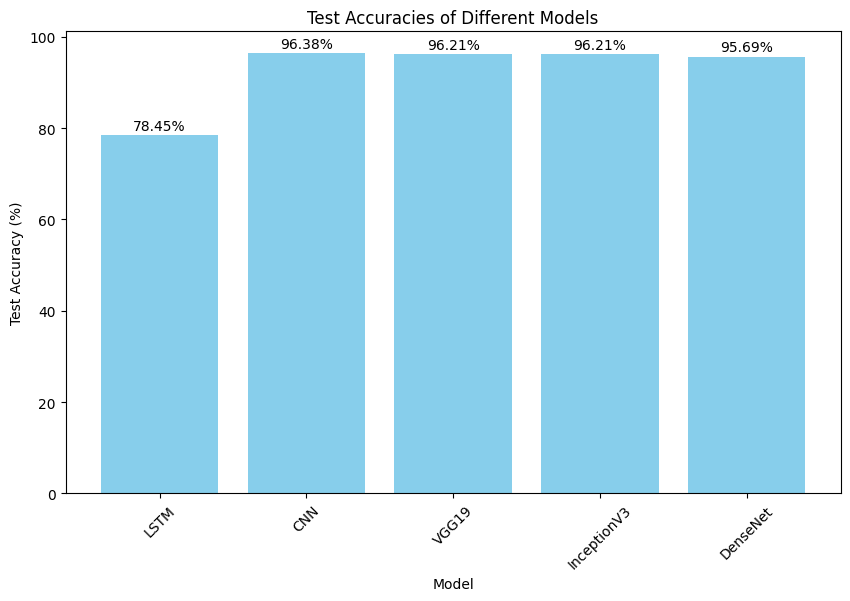

In [ ]:
import matplotlib.pyplot as plt

accuracies = {
    "LSTM": test_acc * 100,
    "CNN": test_accuracy * 100,
    "VGG19": test_accuracy_vgg * 100,
    "InceptionV3": test_accuracy_inception_v3 * 100,
    "DenseNet": test_accuracy_densenet * 100
}

plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracies of Different Models')
plt.xticks(rotation=45)

for bar, accuracy in zip(bars, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.show()
